In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict
from scipy.stats import norm

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

### Test with normal distribution

In [2]:
mu = 96.17
var = 0.042
rv = norm(loc = mu, scale = np.sqrt(var))

In [3]:
# 95% interval
q1 = rv.ppf(0.025)
q2 = rv.ppf(0.975)
print('The value of theta for a 0.95 equal tailed interval between {} and {}'.format(q1, q2))

The value of theta for a 0.95 equal tailed interval between 95.76832691094728 and 96.57167308905272


In [4]:
prob1 = rv.cdf(99.99)
print('The probability with theta = {} is P = {}'.format(100, prob1))

The probability with theta = 100 is P = 1.0


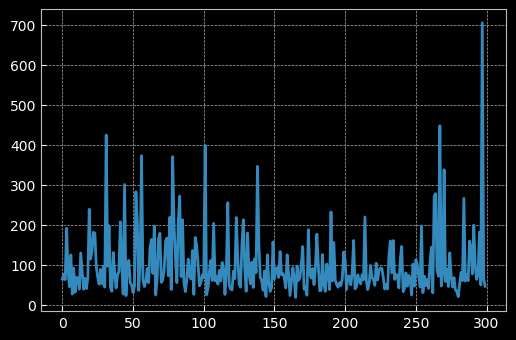

The data mean is: 98.27160157508598


In [5]:
from scipy.stats import gamma

a, b = 3, 200
rv = gamma(a, loc = 0., scale = 1/b)

z = rv.rvs(size=300)
x = 1 / z
plt.plot(x)
plt.show()
print('The data mean is: {}'.format(np.mean(x)))

In [6]:
# Create gamma distribution
a, b = 16.5, 6022.9
rv = gamma(a, loc = 0., scale = 1/b)
# Sample from gamma distribution and crerate inverse gamma
z = rv.rvs(size=1000)
sigma_2 = 1 / z
# Create normal data and use inverse gamma (sigma squared) to generate samples
mu = 609.3
var = 27.1
rv = norm(loc = mu, scale = np.sqrt(sigma_2 / var))
x = rv.rvs(size=1000)

In [7]:
# 95% interval
q1 = rv.ppf(0.025)
q2 = rv.ppf(0.975)
print('The value of theta for a 0.95 equal tailed interval between {} and {}'.format(np.mean(q1), np.mean(q2)))

The value of theta for a 0.95 equal tailed interval between 601.9522813589017 and 616.6477186410981


### Linear Regression

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict

23 previous space shuttle launches before the Challenger disaster
T is the temperature in Fahrenheit, I is the O-ring damage index

In [9]:
!wget http://www.randomservices.org/random/data/Challenger2.txt

--2021-04-23 18:57:55--  http://www.randomservices.org/random/data/Challenger2.txt
Resolving www.randomservices.org (www.randomservices.org)... 66.96.149.1
Connecting to www.randomservices.org (www.randomservices.org)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120 [text/plain]
Saving to: ‘Challenger2.txt.1’

Challenger2.txt.1   100%[===================>]     120  --.-KB/s    in 0s      

2021-04-23 18:57:55 (19,2 MB/s) - ‘Challenger2.txt.1’ saved [120/120]



In [10]:
# Read dataset
oring = pd.read_csv('Challenger2.txt', delimiter = "\t")

In [11]:
# Checking dataframe
print("The shape of the dataset is: {}".format(oring.shape))
oring.head()

The shape of the dataset is: (23, 2)


,T,I
0,53,11
1,57,4
2,58,4
3,63,2
4,66,0


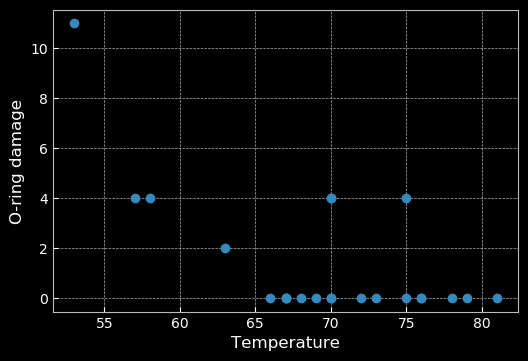

In [12]:
# Plotting the data
plt.plot(oring["T"], oring["I"], "o", label = "Temperatuve vs O ring damage")
plt.xlabel("Temperature")
plt.ylabel("O-ring damage")
plt.show()

All of the launches that had no damage were on warmer days
all of the launches on colder days had some type of damage.

In [13]:
from sklearn.linear_model import LinearRegression

# Convert data into numpy array
temp = np.array(oring["T"]).reshape(-1, 1)
o_ring = np.array(oring["I"]).reshape(-1, 1)
# Fit data with linear regression
reg = LinearRegression().fit(temp, o_ring)
print("The score of the regression is: {}".format(reg.score(temp, o_ring)))
print("The coefficiens of the regression are: {}".format(reg.coef_))
print("The intercept of the regression is: {}".format(reg.intercept_))

The score of the regression is: 0.4116400182981817
The coefficiens of the regression are: [[-0.24337302]]
The intercept of the regression is: [18.36507937]


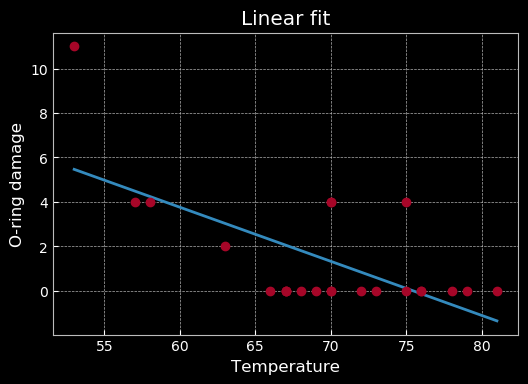

In [14]:
# Show regression fit
o_ring_pred = reg.predict(temp)
plt.plot(temp, o_ring_pred, label = "Temperatuve vs O ring damage hat")
plt.plot(oring["T"], oring["I"], "o", label = "Temperatuve vs O ring damage")
plt.xlabel("Temperature")
plt.ylabel("O-ring damage")
plt.title('Linear fit')
plt.show()

The equatopm to compute the Residual standard error is

$ RSE = \sqrt{\frac{1}{n - 2}RSS} $

Where:

$ RSS = \sum_{i = 1}^n(y - \hat{y}) $

In [15]:
# Computing the residual standard error
RSS = np.sum(np.square(o_ring - o_ring_pred))
rse = np.sqrt(RSS / (o_ring.shape[0] - 2))
print('The residual standard error of the fit is: {}'.format(rse))

The residual standard error of the fit is: 2.1016572843572554


Computing the standard error of the parameters

The Challenger launch was at 31 degrees Fahrenheit
how much o-ring damage would we predict?

In [16]:
y_hat = reg.predict(np.array([31]).reshape(-1,1))
print("The predicted value for damage is: {}".format(y_hat))

The predicted value for damage is: [[10.82051587]]


In [17]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
import statsmodels.api as sm

N = temp.shape[0]
p = temp.shape[1] + 1  # Plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = temp

ols = sm.OLS(o_ring, X_with_intercept)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     14.69
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           0.000968
Time:                        18:57:58   Log-Likelihood:                -48.672
No. Observations:                  23   AIC:                             101.3
Df Residuals:                      21   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3651      4.439      4.138      0.000       9.135      27.596
x1            -0.2434      0.063     -3.833      0.001      -0.375      -0.111
==============================================================================
Omnibus:                        7.558   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.542
Skew:                           1.152   Prob(JB):                       0.0626
Kurtosis:                       3.687   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Computing the standard error of the parameters

In [19]:
# Computing residuals
residuals = o_ring - o_ring_pred
# Sum of squares
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")
# Note that these values coincide with the ones reported above!

SE(beta_hat[0]): 4.438587467985997
SE(beta_hat[1]): 0.06349295575242285


95% posterior interval for the slope:

There are 21 degrees of freedom in the residuals and the residual standard error is 0.06349.

In [20]:
from scipy.stats import t

df = 21
rv = t(df)
# Intercept + std error param * quantile t student 
v1 = -0.24337 - 0.06349*rv.ppf(.975)
v2= -0.24337 + 0.06349*rv.ppf(.975)
print("The lower bound is: {}".format(v1))
print("The lower bound is: {}".format(v2))

The lower bound is: -0.3754046830017593
The lower bound is: -0.11133531699824073


This interval does not include 0 so we can be pretty sure that there is a negative relationship between temperature and damage. Note that these intervals are the same as the frequent confidence intervals when we're using the standard reference prior for Bayesian analysis.

We can also think about a prediction interval. A posterior prediction interval. So if we are going to launch at 31 degrees, what is a 95% predictive interval for what we might see in damage? This is gonaa be a larger interval than just a fitted interval.

Recall that the equation for the scale or variance of a new prediction is:

$SE_r \sqrt{1 + \frac{1}{n} + \frac{(n - 1)(x^* - \bar{x})}{S_x^2}} $

$SE_r = \text{Residual standard error of regression} $

$S_x^2 = \text{Sample variance} $

In [21]:
# The mean value is the one shown above, for the lower interval we have:
# T student distribution
df = 21
rv = t(df)

n = 23 # Number os samples temp.shape[0]
x_star = 31 # Value to predict
mean_temp = np.mean(temp) # Mean Temp
sample_variance = np.var(temp) # Variance Temp
lower_bound = 10.82052 - ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + (np.power(x_star - mean_temp, 2) / (n - 1) / sample_variance)))
upper_bound = 10.82052 + ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + (np.power(x_star - mean_temp, 2) / (n - 1) / sample_variance)))
print("The lower bound for the predictive interval is: {}".format(lower_bound))
print("The lower bound for the predictive interval is: {}".format(upper_bound))

The lower bound for the predictive interval is: 3.9618044357401203
The lower bound for the predictive interval is: 17.67923556425988


A 95% predictive interval goes from about 4.05 to 17.59.

Posterior probability that damage index is greater than zero at 31F? As the posterior distribution works as a T student.

So it's a $t$ distribution I'm going to ask what's probably a T with this center and this scale is bigger than 0. The rv.cdf command will give us the probability it's less than 0 and so we take 1 minus that to get the probability it's bigger than 0. Probably, that the damage will be bigger than 0 is 0.998, very close to one. So it’s extremely likely that there will be damage if we are to launch at 31 degrees Fahrenheit.

In [22]:
prob = 1 - rv.cdf((0 - 10.82052) / (rse * np.sqrt(1+ (1/n) +(np.power(x_star - mean_temp, 2)/ (n - 1) / sample_variance))))
print("The posterior probability that the damage index is greather than zero is: {}".format(prob))

The posterior probability that the damage index is greather than zero is: 0.9982172224679936


### Multiple regression example

Galton in the 19th century in Britain was looking at predicting the heights of children from the heights of the parents. All these measurements are in inches. 

In [23]:
!wget http://www.randomservices.org/random/data/Galton.txt

--2021-04-23 18:57:59--  http://www.randomservices.org/random/data/Galton.txt
Resolving www.randomservices.org (www.randomservices.org)... 66.96.149.1
Connecting to www.randomservices.org (www.randomservices.org)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16429 (16K) [text/plain]
Saving to: ‘Galton.txt.1’

Galton.txt.1        100%[===================>]  16,04K  --.-KB/s    in 0,1s    

2021-04-23 18:58:00 (149 KB/s) - ‘Galton.txt.1’ saved [16429/16429]



In [24]:
# Read dataset
galton = pd.read_csv('Galton.txt', delimiter = "\t")
# Checking dataframe
print("The shape of the dataset is: {}".format(galton.shape))
galton.head()

The shape of the dataset is: (898, 6)


,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


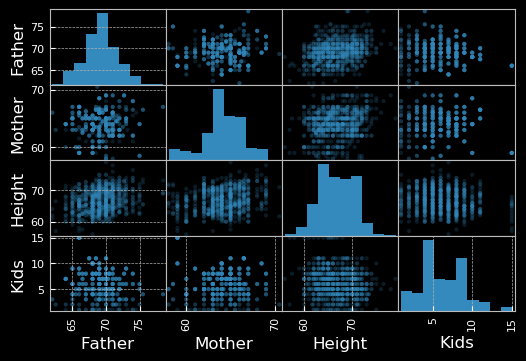

In [25]:
pd.plotting.scatter_matrix(galton, alpha=0.2)
plt.show()

In [26]:
# Convert data into numpy array
mapping = {'M': 2, 'F': 1}
galton = galton.replace({'Gender': mapping})
X = galton[["Father", "Mother", 'Gender']]
Y = galton["Height"]
# Fit data with linear regression
reg = LinearRegression().fit(X, Y)
print("The score of the regression is: {}".format(reg.score(X, Y)))
print("The coefficiens of the regression are: {}".format(reg.coef_))
print("The intercept of the regression is: {}".format(reg.intercept_))

The score of the regression is: 0.6396752443093426
The coefficiens of the regression are: [0.40597803 0.32149514 5.22595131]
The intercept of the regression is: 10.118808708269981


In [27]:
N = galton.shape[0]
p = 3 + 1  # Three are the number of features used

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X

ols = sm.OLS(Y, X_with_intercept)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Fri, 23 Apr 2021   Prob (F-statistic):          1.33e-197
Time:                        18:58:05   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1188      2.761      3.665      0.000       4.700      15.537
x1             0.4060      0.029     13.900      0.000       0.349       0.463
x2             0.3215      0.031     10.277      0.000       0.260       0.383
x3             5.2260      0.144     36.289      0.000       4.943       5.509
==============================================================================
Omnibus:                       11.936   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.952
Skew:                          -0.145   Prob(JB):                     0.000344
Kurtosis:                       3.585   Cond. No.                     3.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Show regression fit
Y_hat = reg.predict(X)
# Computing the residual standard error
RSS = np.sum(np.square(Y - Y_hat))
rse = np.sqrt(RSS / (X.shape[0] - 2))
print('The residual standard error of the fit is: {}'.format(rse))

The residual standard error of the fit is: 2.151920351875499


### Analyzing data
Each extra inch taller a father is is correlated with 0.4 inch extra height in the child
Each extra inch taller a mother is is correlated with 0.3 inch extra height in the child
A male child is on average 5.2 inches taller than a female child

What's the ninety five percent probability interval for the difference in heights between boys and girls. 

In [29]:
# The mean value is the one shown above, for the lower interval we have:
# T student distribution
df = 894
rv = t(df)

# As we are analyzing the gender, lets plug in that data
# Intercept + std error param * quantile t student 

# Changed size as 
v1 = 5.2260 - 0.144*rv.ppf(.975)
v2= 5.2260 + 0.144*rv.ppf(.975)
print("The lower bound is: {}".format(v1))
print("The lower bound is: {}".format(v2))

The lower bound is: 4.943382566373184
The lower bound is: 5.508617433626816


We can use that to get a 95 percent probability interval for
this slope effect of gender and see that that ranges from 4.94 to 5.51. 

So we could ask what's the predicted height And predicted 95% probability interval for child's height when the father is 68 inches tall, the mother is 64 inches tall, and the child is either male or female. 

In [30]:
# The mean value is the one shown above, for the lower interval we have:
# T student distribution
df = 894
rv = t(df)
# Data
heigh_f = 68
height_m = 64 
male = 2
female = 1 
y_hat_fem = reg.predict(np.array([heigh_f, height_m, female]).reshape(1,-1))
y_hat_mal = reg.predict(np.array([heigh_f, height_m, male]).reshape(1,-1))
print("The predicted height for male is: {}".format(y_hat_mal))
print("The predicted height for female is: {}".format(y_hat_fem))

# Bound for male
n = X.shape[0] # Number os samples temp.shape[0]
x_star_male = np.array([heigh_f, height_m, male]) # Value to predict
mean_temp = np.mean(X) # Mean Temp
sample_variance = np.var(X) # Variance Temp
lower_bound = y_hat_mal - ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + np.mean((np.power(x_star_male - mean_temp, 2) / (n - 1) / sample_variance))))
upper_bound = y_hat_mal + ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + np.mean((np.power(x_star_male - mean_temp, 2) / (n - 1) / sample_variance))))
print("The lower bound for the predictive interval for male is: {}".format(lower_bound))
print("The lower bound for the predictive interval for male is: {}".format(upper_bound))

# Bound for female
n = X.shape[0] # Number os samples temp.shape[0]
x_star_female = np.array([heigh_f, height_m, female]) # Value to predict
mean_temp = np.mean(X) # Mean Temp
sample_variance = np.var(X) # Variance Temp
lower_bound = y_hat_fem - ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + np.mean((np.power(x_star_female - mean_temp, 2) / (n - 1) / sample_variance))))
upper_bound = y_hat_fem + ((rse * rv.ppf(.975)) * np.sqrt(1 + (1/n) + np.mean((np.power(x_star_female - mean_temp, 2) / (n - 1) / sample_variance))))
print("The lower bound for the predictive interval for female is: {}".format(lower_bound))
print("The lower bound for the predictive interval for female is: {}".format(upper_bound))

The predicted height for male is: [68.7529057]
The predicted height for female is: [63.52695438]
The lower bound for the predictive interval for male is: [64.52622374]
The lower bound for the predictive interval for male is: [72.97958766]
The lower bound for the predictive interval for female is: [59.30016052]
The lower bound for the predictive interval for female is: [67.75374825]
